In [45]:
import h5py
import math
import bisect
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.font_manager._rebuild()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
from IPython.display import set_matplotlib_formats
from IPython.display import display, Latex
set_matplotlib_formats('png', 'pdf')
import seaborn as sns

In [2]:
class Data:
    def __init__(self, file):
        self.x = np.array(file['BubbleScale/Variable'])
        self.imagx = np.array(file['BubbleScale/Imag'])
        self.realx = np.array(file['BubbleScale/Real'])
        self.imagDeriv = np.array(file['BubbleScale/ImagDeriv'])
        self.alpha = file['BubbleScale'].attrs['alphaT']

In [3]:
class ScalingPlots(Data):
    def __init__(self,file):
        Data.__init__(self,file)
        
# explicit evaluation of imaginary part
    def imagPlot(self):
        def f(x):
            if(x<1/8):
                return 0.0
            else:
                return -1.0/(2.0*math.pi)*math.sqrt(2*math.sqrt(2*(1+x))-3)
        f2 = np.vectorize(f)
        x = np.linspace(self.x[0], self.x[-1], 5000)
        plt.plot(self.x,self.imagx,label='Numerics')
        plt.plot(x, f2(x),label='Exact result',linestyle='dashed')
        
        plt.xlabel(r'$x$',fontsize=20)
        plt.ylabel(r'$ImI_{\alpha}(x)$',fontsize=20)
        plt.xlim([-1,1])
        #plt.ylim([-0.5,0.2])
        #plt.axvline(0.0,linewidth=1,color='black',linestyle='--')
        plt.legend()
        plt.show()
  
    def imagDerivPlot(self):
        def f(x):
            if(x<1/8):
                return 0.0
            else:
                return -1.0/(2.0*math.pi*math.sqrt(2*(1+x))*math.sqrt(2*math.sqrt(2*(1+x))-3))
        f2 = np.vectorize(f)
        x = np.linspace(self.x[0], self.x[-1], 5000)
        plt.plot(x, f2(x),label='Exact result')
        
        plt.plot(self.x,self.imagDeriv,label='Numerics',linestyle='dashed')
        plt.xlabel(r'$x$',fontsize=20)
        plt.ylabel(r'$\frac{d}{dx}ImI_{\alpha}(x)$',fontsize=20)
        plt.xlim([self.x[0],self.x[-1]])
        plt.ylim([-0.5,0.2])
        #plt.axvline(0.0,linewidth=1,color='black',linestyle='--')
        plt.legend()
        plt.show()

    def realPlot(self):
        def f(x):
            if(x<1/8):
                return 1.0/(math.pi)*math.sqrt(3/2+math.sqrt(1/4-2*x))
            else:
                return 1.0/(2.0*math.pi)*math.sqrt(2*math.sqrt(2*(1+x))+3)
        f2 = np.vectorize(f)
        x = np.linspace(self.x[0], self.x[-1], 5000)
        plt.plot(x, f2(x),label='Exact result')
        
        plt.plot(self.x,self.realx,label='Numerics',linestyle='dashed')
        plt.xlabel(r'$x$',fontsize=20)
        plt.ylabel(r'$ReI_{\alpha}(x)$',fontsize=20)
        #plt.xlim([-0.2,0.2])
        #plt.ylim([-0.5,0.2])
        #plt.axvline(0.0,linewidth=1,color='black',linestyle='--')
        plt.legend()
        plt.show()
            


In [11]:
foo=ScalingPlots(h5py.File('bubbleScale400.h5','r'))

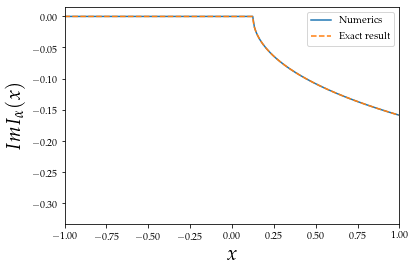

In [12]:
foo.imagPlot()

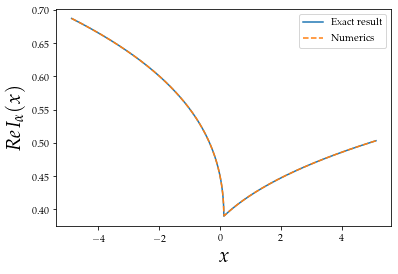

In [13]:
foo.realPlot()

In [15]:
foo400=ScalingPlots(h5py.File('bubbleScale400.h5','r'))
foo350=ScalingPlots(h5py.File('bubbleScale350.h5','r'))
foo300=ScalingPlots(h5py.File('bubbleScale300.h5','r'))
foo250=ScalingPlots(h5py.File('bubbleScale250.h5','r'))
foo200=ScalingPlots(h5py.File('bubbleScale200.h5','r'))

In [16]:
atlist = [foo400,foo350,foo300,foo250,foo200]
mt = [4.00,3.5,3.0,2.5,2.0]

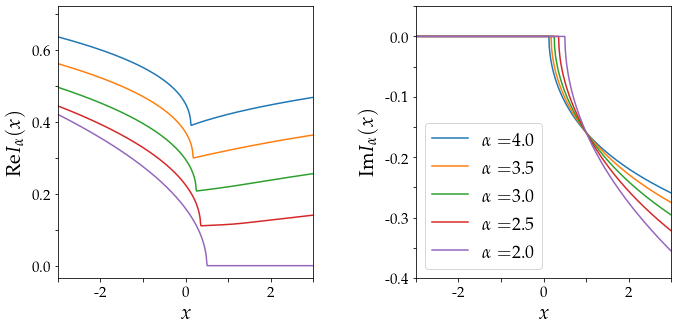

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,5))
plt.subplots_adjust(wspace=0.4)

for i in range(len(atlist)):
    ax1.plot(atlist[i].x,atlist[i].realx,label=r'$\alpha =$' + str(mt[i]))
ax1.set_xlabel(r'$x$',fontsize=20)
ax1.set_ylabel(r'$\text{Re} I_\alpha (x)$',fontsize=20)
ax1.set_xlim([-3,3])
#ax1.set_ylim([-0.05,0.7])

x1ticks = np.arange(-3,3.1,1)
x1labels = ['',str(-2),'',str(0),'',str(2),'']
ax1.set_xticks(x1ticks)
ax1.set_xticklabels(x1labels,fontsize=15)

y1ticks = np.arange(0.0,0.71,0.1)
y1labels = [str(0.0),'',str(0.2),'',str(0.4),'',str(0.6),'']
ax1.set_yticks(y1ticks)
ax1.set_yticklabels(y1labels,fontsize=15)


for i in range(len(atlist)):
    ax2.plot(atlist[i].x,atlist[i].imagx,label=r'$\alpha = $' + str(mt[i]))
ax2.set_xlabel(r'$x$',fontsize=20)
ax2.set_ylabel(r'$\text{Im} I_\alpha(x)$',fontsize=20)
ax2.set_xlim([-3,3])
ax2.set_ylim([-0.4,0.05])
ax2.legend(fontsize=18,loc='lower left')

x2ticks = np.arange(-3,3.1,1)
x2labels = ['',str(-2),'',str(0),'',str(2),'']
ax2.set_xticks(x2ticks)
ax2.set_xticklabels(x2labels,fontsize=15)

y2ticks = np.arange(-0.4,0.06,0.05)
y2labels = [str(-0.4),'',str(-0.3),'',str(-0.2),'',str(-0.1),'',str(0.0),'']
ax2.set_yticks(y2ticks)
ax2.set_yticklabels(y2labels,fontsize=15)
plt.savefig('Graphics/fig1alt.pdf',bbox_inches="tight")